In [11]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-07-08 11:58:44,491: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

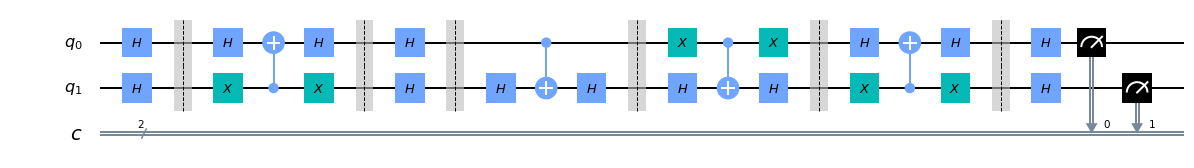

In [8]:
c = QuantumCircuit(2,2)
c.h([0,1])
c.barrier()
c.h(0)
c.x(1)
c.cx(1,0)
c.h(0)
c.x(1)
c.barrier()
c.h([0,1])
c.barrier()
c.h(1)
c.cx(0,1)
c.h(1)
c.barrier()
c.x(0)
c.h(1)
c.cx(0,1)
c.x(0)
c.h(1)
c.barrier()
c.h(0)
c.x(1)
c.cx(1,0)
c.h(0)
c.x(1)
c.barrier()
c.h([0,1])
c.measure([0,1], [0,1])

c.draw()

Job Status: job has successfully run


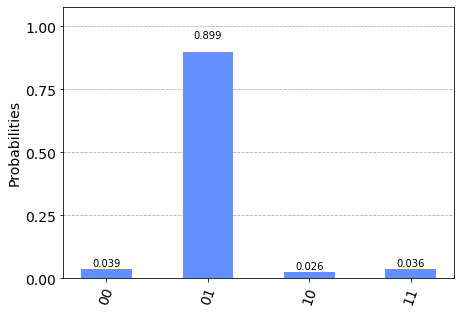

In [13]:
def run(b, circuit):
    provider = IBMQ.get_provider("ibm-q")
    backend = provider.get_backend(b)
    job = execute(circuit, backend=backend, shots=1000)
    job_monitor(job)
    return(job)

job = run("ibmqx2", c)

result = job.result()
counts = result.get_counts(c)
plot_histogram([counts])